In [ ]:
#web scrapping- extracting something from the web
#beautiful soup- web scrapping library- we'll tru to extract reviews from users


In [1]:
#requests lib reads the url and loads the webpage

import requests
from bs4 import BeautifulSoup as bs

In [28]:
url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-256GB/product-reviews/B09G91FCBT?reviewerType=all_reviews'
page= requests.get(url)   #extracts url and load data of the page
page    #[200]

<Response [200]>

In [29]:
#display page source code but not readable format
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n\n<!-- sp:end-feature:csm:head-open-part2 -->\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,410yLeQZHKL.css,31OSFXVtM5L.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.cs

In [30]:
soup=bs(page.content,'html.parser')       #html code into readable format

In [ ]:
soup

In [36]:
#never consider top positive or critical review

#Never ever consider TOP POSITIVE and TOP CRITICAL review
names = soup.find_all('span',class_ ='a-profile-name')[4:]
names

[<span class="a-profile-name">Ashutosh Satapathy</span>,
 <span class="a-profile-name">Ayush Kamboj</span>,
 <span class="a-profile-name">Prince Patel</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Joydeep bhattacharya</span>,
 <span class="a-profile-name">MAHINDRA JAIN KAPIL</span>,
 <span class="a-profile-name">DS</span>,
 <span class="a-profile-name">Syed’s </span>,
 <span class="a-profile-name">Bikesh gupta</span>,
 <span class="a-profile-name">Bikesh gupta</span>]

In [37]:
type(names)

list

In [38]:
len(names)

10

In [42]:
#Now let us create dataframe using the data from the names list
import pandas as pd
df = pd.DataFrame(names,columns = ['Customer Name'])
df


,Customer Name
0,Ashutosh Satapathy
1,Ayush Kamboj
2,Prince Patel
3,Amazon Customer
4,Joydeep bhattacharya
5,MAHINDRA JAIN KAPIL
6,DS
7,Syed’s
8,Bikesh gupta
9,Bikesh gupta


In [43]:
#review title

r_title= soup.find_all('a',class_='review-title')
r_title

                                                                                                         #review title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2TOF8DM4TEV4H?ASIN=B09G91FCBT">
 <span>Camera, Performance</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3KQ2GHOCWC79F?ASIN=B09G91FCBT">
 <span>Amazing Phone</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RU300RKHU9AW4?ASIN=B09G91FCBT">
 <span>Best Battery. Best Camera. Very smooth. But not value for money.</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3FKSLH5C25908?ASIN=B09G91FCBT">
 <span>Best battery life</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-ti

In [44]:
len(r_title)

10

In [45]:
#data cleaning
review_title= []        #empty list
for i in range(0,len(r_title)):
  review_title.append(r_title[i].get_text()[1:-1])
review_title

['Camera, Performance',
 'Amazing Phone',
 'Best Battery. Best Camera. Very smooth. But not value for money.',
 'Best battery life',
 'Excellent product',
 'Expensive',
 'Awesome',
 'The best ever phone in the market',
 'Open box diye sim tool nahi aa ya but phone mast aaya',
 'The iPhone 13 Pro Max’s stellar cameras, 120Hz +Best cameras in a phone +Superior performance']

In [46]:
#review date
dates=soup.find_all('span',class_='review-date')[2:]
dates

[<span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 16 April 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 27 March 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 7 June 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 27 September 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 17 January 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 16 November 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳 on 28 December 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India 🇮🇳

In [47]:
len(dates)

10

In [48]:
#data cleaning
review_date=[]           #empty list
for i in range(0,len(dates)):
  review_date.append(dates[i].get_text().replace('Reviewed in India on',''))
review_date

['Reviewed in India 🇮🇳 on 16 April 2023',
 'Reviewed in India 🇮🇳 on 27 March 2023',
 'Reviewed in India 🇮🇳 on 7 June 2022',
 'Reviewed in India 🇮🇳 on 27 September 2022',
 'Reviewed in India 🇮🇳 on 17 January 2023',
 'Reviewed in India 🇮🇳 on 16 November 2022',
 'Reviewed in India 🇮🇳 on 28 December 2022',
 'Reviewed in India 🇮🇳 on 11 April 2022',
 'Reviewed in India 🇮🇳 on 7 October 2022',
 'Reviewed in India 🇮🇳 on 21 March 2022']

In [49]:
#review rating
rating= soup.select('i.review-rating')[2:]
rating

[<i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-

In [50]:
len(rating)

10

In [51]:
#data cleaning
review_rating=[]   #empty list
for i in range(0,len(rating)):
  review_rating.append(rating[i].get_text())
review_rating

['5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars']

In [52]:
len(rating)

10

In [53]:
#Data cleaning
review_rating=[]
for i in range(0,len(rating)):
  review_rating.append(rating[i].get_text())
review_rating

['5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars']

In [54]:
#review title content
content= soup.select('span.review-text')
content


[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>It's a very powerful phone with great camera features. I am really happy with this iPhone.</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>High benefits with high price. I m in love with this device.</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Switched from Android to iPhone. Here are my pros and cons.<br><br/>Pros:<br/><br/>1) The battery life on the Pro Max is just excellent. No android with even a 6000 Mah can beat it, it is that well optimised.<br/>2) The camera as you can guess is one of the best if not the best.<br/>3) The screen with 120hz feels so smooth. It’s just a different experience. Androids with similar refresh don’t feel so smooth because they are poorly optimised.<br/><br/>Cons:<br/><br/>1) The price. Got the 512GB pro max for 1.55 lac. and that is not at al

In [55]:
len(content)

10

In [56]:
#data filtering
review_content=[]     #empty list
for i in range(0,len(content)):
  review_content.append(content[i].get_text().replace('\n',''))
review_content

["It's a very powerful phone with great camera features. I am really happy with this iPhone.",
 'High benefits with high price. I m in love with this device.',
 'Switched from Android to iPhone. Here are my pros and cons.Pros:1) The battery life on the Pro Max is just excellent. No android with even a 6000 Mah can beat it, it is that well optimised.2) The camera as you can guess is one of the best if not the best.3) The screen with 120hz feels so smooth. It’s just a different experience. Androids with similar refresh don’t feel so smooth because they are poorly optimised.Cons:1) The price. Got the 512GB pro max for 1.55 lac. and that is not at all value for the amount of money you spend. With no charger!2) Software wise, the notifications are really bad. Android compiles notifications much better. Also, it’s really tricky to transfer Whatsapp and other stuff from an Android.',
 "I first purchased iPhone 14 pro then I realized that it drains the battery quickly(Don't have any idea about

In [57]:
review_content[0]

"It's a very powerful phone with great camera features. I am really happy with this iPhone."

In [58]:
df['Review title']= review_title
df['Review date']= review_date
df['Review Content']= review_content
df['Review Rating']= review_rating
df

,Customer Name,Review title,Review date,Review Content,Review Rating
0,Ashutosh Satapathy,"Camera, Performance",Reviewed in India 🇮🇳 on 16 April 2023,It's a very powerful phone with great camera f...,5.0 out of 5 stars
1,Ayush Kamboj,Amazing Phone,Reviewed in India 🇮🇳 on 27 March 2023,High benefits with high price. I m in love wit...,5.0 out of 5 stars
2,Prince Patel,Best Battery. Best Camera. Very smooth. But no...,Reviewed in India 🇮🇳 on 7 June 2022,Switched from Android to iPhone. Here are my p...,4.0 out of 5 stars
3,Amazon Customer,Best battery life,Reviewed in India 🇮🇳 on 27 September 2022,I first purchased iPhone 14 pro then I realize...,5.0 out of 5 stars
4,Joydeep bhattacharya,Excellent product,Reviewed in India 🇮🇳 on 17 January 2023,Overall excellent product,5.0 out of 5 stars
5,MAHINDRA JAIN KAPIL,Expensive,Reviewed in India 🇮🇳 on 16 November 2022,Expensive,4.0 out of 5 stars
6,DS,Awesome,Reviewed in India 🇮🇳 on 28 December 2022,Offline Peksha best deal Only Amazon,5.0 out of 5 stars
7,Syed’s,The best ever phone in the market,Reviewed in India 🇮🇳 on 11 April 2022,I have started using iPhone from 5 series and ...,5.0 out of 5 stars
8,Bikesh gupta,Open box diye sim tool nahi aa ya but phone ma...,Reviewed in India 🇮🇳 on 7 October 2022,Open box diye sim tool nahi aa ya but phone ma...,4.0 out of 5 stars
9,Bikesh gupta,"The iPhone 13 Pro Max’s stellar cameras, 120Hz...",Reviewed in India 🇮🇳 on 21 March 2022,"The iPhone 13 Pro Max’s stellar cameras, 120Hz...",4.0 out of 5 stars


In [ ]:
#REGRESSION- predicting something wrt to parameter or entity(area vs price,years vs salary)

In [ ]:
#FORECASTING-predicting something wrt to time

In [ ]:
#FORECAsTING VEGETABLE PRICES   (forecasting lib used-FBPROPHET)

In [ ]:
#create dataframe
import pandas as pd
df=pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df


,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,02/Jan/2004,KURNOOL(AP),142,550,835,650
1,05/Jan/2004,KURNOOL(AP),160,695,835,745
2,06/Jan/2004,KURNOOL(AP),308,650,865,760
3,19/Jan/2004,KURNOOL(AP),190,680,980,830
4,24/Jan/2004,KURNOOL(AP),112,600,820,730
...,...,...,...,...,...,...
3198,31/Jul/2021,KURNOOL(AP),1686,610,1840,1450
3199,27/Aug/2021,KURNOOL(AP),1489,500,1751,1150
3200,31/Aug/2021,KURNOOL(AP),3795,507,1651,1050
3201,13/Sep/2021,KURNOOL(AP),6854,445,1761,1100


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  3202 non-null   object
 1   Market                3203 non-null   object
 2   Arrival(q)            3203 non-null   int64 
 3   Price Minimum (Rs/q)  3203 non-null   object
 4   Price Maximum (Rs/q)  3203 non-null   object
 5   Modal Price (Rs/q)    3203 non-null   object
dtypes: int64(1), object(5)
memory usage: 150.3+ KB


In [ ]:
df.shape

(3203, 6)

In [ ]:
df.size

19218

In [ ]:
#null val check
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#drop null val
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3202 entries, 0 to 3201
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  3202 non-null   object
 1   Market                3202 non-null   object
 2   Arrival(q)            3202 non-null   int64 
 3   Price Minimum (Rs/q)  3202 non-null   object
 4   Price Maximum (Rs/q)  3202 non-null   object
 5   Modal Price (Rs/q)    3202 non-null   object
dtypes: int64(1), object(5)
memory usage: 175.1+ KB


In [ ]:
#before applying FB PROPHET algo, we use some rules and protocol
#only 2 cols are considered- ds(date) and y(modal price) - rename it as

df= df.rename(columns={'Modal Price (Rs/q)':'y','Date':'ds'})
df

,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,02/Jan/2004,KURNOOL(AP),142,550,835,650
1,05/Jan/2004,KURNOOL(AP),160,695,835,745
2,06/Jan/2004,KURNOOL(AP),308,650,865,760
3,19/Jan/2004,KURNOOL(AP),190,680,980,830
4,24/Jan/2004,KURNOOL(AP),112,600,820,730
...,...,...,...,...,...,...
3197,29/Jul/2021,KURNOOL(AP),1784,650,1860,1290
3198,31/Jul/2021,KURNOOL(AP),1686,610,1840,1450
3199,27/Aug/2021,KURNOOL(AP),1489,500,1751,1150
3200,31/Aug/2021,KURNOOL(AP),3795,507,1651,1050


In [ ]:
#new dataframe with only ds and y cols

df_new=df[['ds','y']]
df_new

,ds,y
0,02/Jan/2004,650
1,05/Jan/2004,745
2,06/Jan/2004,760
3,19/Jan/2004,830
4,24/Jan/2004,730
...,...,...
3197,29/Jul/2021,1290
3198,31/Jul/2021,1450
3199,27/Aug/2021,1150
3200,31/Aug/2021,1050


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3202 entries, 0 to 3201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      3202 non-null   object
 1   y       3202 non-null   object
dtypes: object(2)
memory usage: 75.0+ KB


In [ ]:
#ds and y col's datatype is not in proper format
#ds --> from obj to datetime format
#y --> into int format

df_new['ds']= pd.to_datetime(df_new['ds'])
df_new['y']= df_new['y'].astype(int)

<ipython-input-13-6c1daafef2db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ds']= pd.to_datetime(df_new['ds'])
<ipython-input-13-6c1daafef2db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['y']= df_new['y'].astype(int)


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3202 entries, 0 to 3201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3202 non-null   datetime64[ns]
 1   y       3202 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 75.0 KB


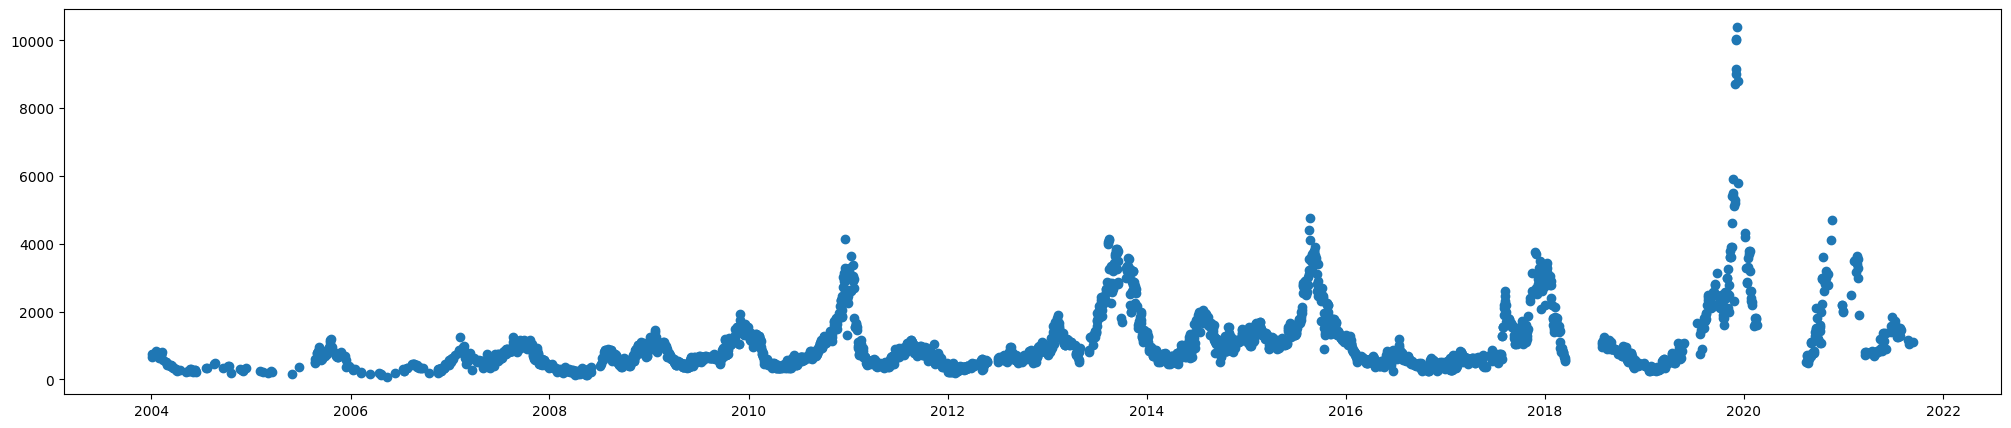

In [ ]:
#visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.scatter(df_new['ds'],df_new['y'])

In [ ]:
#prophet part algo
import prophet
op= prophet.Prophet()
op.fit(df_new)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3ojke48/mxpiqpy9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3ojke48/l0riwngu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58231', 'data', 'file=/tmp/tmpx3ojke48/mxpiqpy9.json', 'init=/tmp/tmpx3ojke48/l0riwngu.json', 'output', 'file=/tmp/tmpx3ojke48/prophet_modelexidyqu5/prophet_model-20230613045850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:58:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:58:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast= op.make_future_dataframe(periods=365,freq='M')
forecast= op.predict(forecast)

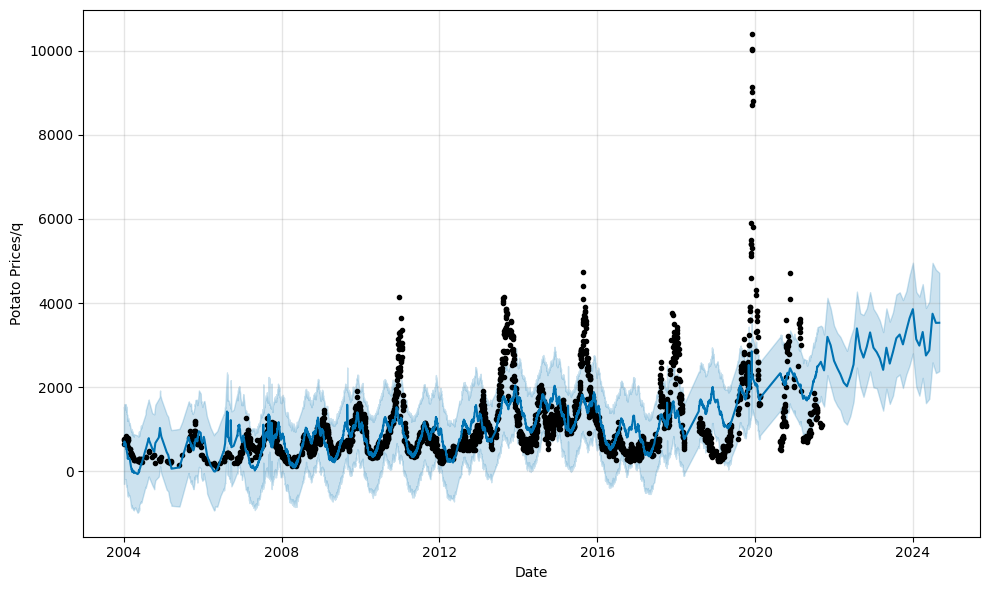

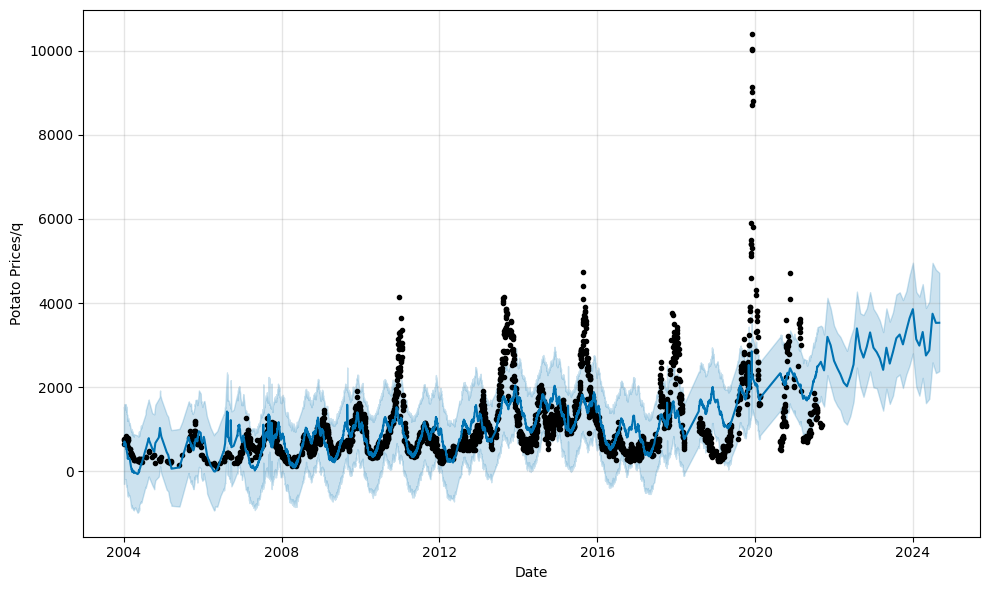

In [ ]:
op.plot(forecast,xlabel='Date',ylabel='Potato Prices/q')

In [ ]:
#black dots- actual prices of potato from dataframe

In [ ]:
#light blue dots- min and max value as predicted by our model

In [ ]:
#dark blue line- best fit line